# Units

Questions about the parameters:  
Protons Flux ? How is it defined (protons/sec) ?  
Check formula for D ? Right stdev ?  
Right noise ? Not sure about this it.  


# TODO
Normalizer 
calculer coarse D (sur les centres de gravité)
creer le cnn, commencer à fit

# Parameters


Positions in nm  
1 pixel is 100nm  
Image size: Nx * Ny * Nt  
Nx = Ny = 100 pixels  
Nt: number of frames 10   
Interframe positions: 10  
The mollecule always starts in the center of the first frame.  
delta_t: Time between two frames: 10 ms  
Generate images for a chosen D in [10^-1, 10] (micro_meter)^2/second  
Microscope FWHM (Full width half maximum): 100nm (later push up to 250nm)  
Flux: 10 photons/ms  
Amplitude of diraqs: Flux * delta_t /Interframe positions  
PSF (Point Spread function): start with Gaussian, then use specified one 


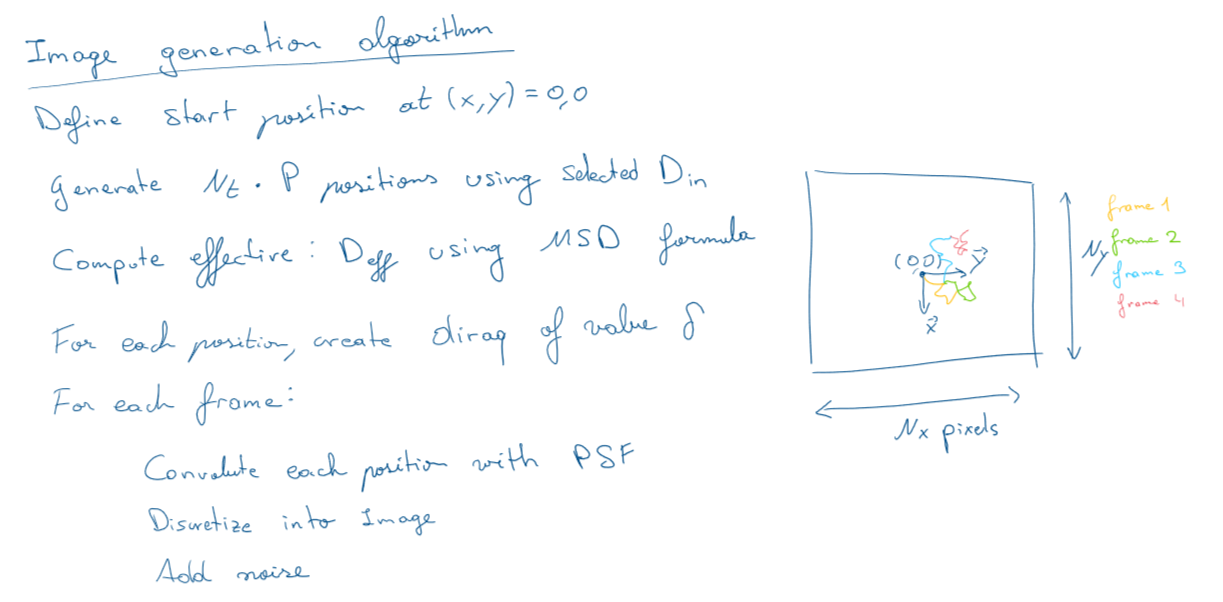

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy import stats
from skimage.io import imsave
import time
import numpy as np
from skimage.measure import block_reduce
from skimage.util import random_noise
from sklearn.linear_model import LinearRegression


c:\ProgramData\anaconda3\Lib\site-packages\paramiko\pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
c:\ProgramData\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.Blowfish and will be removed from this module in 45.0.0.
  "class": algorithms.Blowfish,
c:\ProgramData\anaconda3\Lib\site-packages\paramiko\transport.py:243: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "class": algorithms.TripleDES,


In [26]:
# Hyperparameters for simulation
nparticles = 1000   # Number of particles
nframes = 4    # Number of steps in the simulation
nposframe = 10    # Number of position per frame
dt = 0.01        # Integration time frame in second (time between two frames)
DGen = 10000        # Diffusion coefficient in nm^2 per s (=0.001 (um^2)/s)
num_steps = nframes*nposframe
D=15000
# Hyperparameters for image generation
npixel = 64 # number of image pixels
pixelsize = 100 # in nm 
fwhm_psf = 200 # full width half maximum (emulates microscope)
factor_hr = 5 # image high resulution factor
flux = 100 # number of photons per s
poisson_noise = 100 
gaussian_noise = 10
background = 100 # base background value
normalizeValue = 1000 # value by which all samples will be normalized ! Needs to be fixed and the same for all images !

In [3]:
#%load_ext autoreload
%reload_ext autoreload
%autoreload 2
from helpers import *
from generate_images_fast import generateImagesAndEstimateDMAXD

ImportError: cannot import name 'generateImagesAndEstimateDMAXD' from 'generate_images_fast' (unknown location)

In [28]:
%timeit generateImagesAndEstimateDMAXD(120, nframes, npixel, factor_hr, nposframe, DGen, dt, fwhm_psf, pixelsize,flux, background, poisson_noise, gaussian_noise, normalizeValue)
%timeit generateImagesAndEstimateDFAST(120, nframes, npixel, factor_hr, nposframe, DGen, dt, fwhm_psf, pixelsize,flux, background, poisson_noise, gaussian_noise, normalizeValue)
%timeit generateImagesAndEstimateD(120, nframes, npixel, factor_hr, nposframe, DGen, dt, fwhm_psf, pixelsize,flux, background, poisson_noise, gaussian_noise, normalizeValue)

#plot_image_frames16(im[0,:], str(d[0]))

Generating trajectories: 100%|██████████| 120/120 [00:02<00:00, 59.71it/s]


running program on each 12 cpu core of the computer


Generating trajectories: 100%|██████████| 120/120 [00:01<00:00, 61.36it/s]


running program on each 12 cpu core of the computer


Generating trajectories: 100%|██████████| 120/120 [00:01<00:00, 61.70it/s]


running program on each 12 cpu core of the computer


Generating trajectories: 100%|██████████| 120/120 [00:01<00:00, 61.67it/s]


running program on each 12 cpu core of the computer


Generating trajectories: 100%|██████████| 120/120 [00:01<00:00, 60.80it/s]


running program on each 12 cpu core of the computer


Generating trajectories: 100%|██████████| 120/120 [00:01<00:00, 60.86it/s]


running program on each 12 cpu core of the computer


Generating trajectories: 100%|██████████| 120/120 [00:01<00:00, 60.95it/s]


running program on each 12 cpu core of the computer


Generating trajectories: 100%|██████████| 120/120 [00:01<00:00, 60.92it/s]


running program on each 12 cpu core of the computer


Generating images and estimating D: 100%|██████████| 120/120 [00:11<00:00, 10.04it/s]


13.9 s ± 86.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
running program on each 12 cpu core of the computer


Generating images and estimating D: 100%|██████████| 120/120 [00:11<00:00, 10.16it/s]


running program on each 12 cpu core of the computer


Generating images and estimating D: 100%|██████████| 120/120 [00:11<00:00, 10.28it/s]


running program on each 12 cpu core of the computer


Generating images and estimating D: 100%|██████████| 120/120 [00:11<00:00, 10.08it/s]


running program on each 12 cpu core of the computer


Generating images and estimating D: 100%|██████████| 120/120 [00:11<00:00, 10.19it/s]


running program on each 12 cpu core of the computer


Generating images and estimating D: 100%|██████████| 120/120 [00:11<00:00, 10.23it/s]


running program on each 12 cpu core of the computer


Generating images and estimating D: 100%|██████████| 120/120 [00:11<00:00, 10.17it/s]


running program on each 12 cpu core of the computer


Generating images and estimating D: 100%|██████████| 120/120 [00:11<00:00, 10.17it/s]


running program on each 12 cpu core of the computer


Generating images and estimating D: 100%|██████████| 120/120 [00:11<00:00, 10.20it/s]


11.9 s ± 68.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
35.5 s ± 365 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


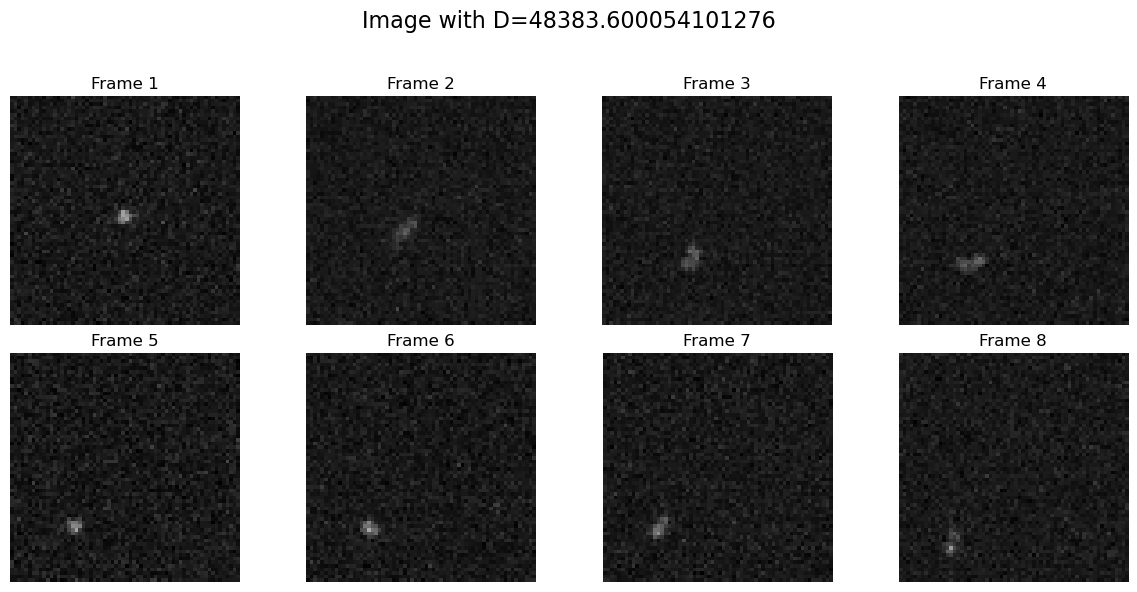

(39,)
(40,)


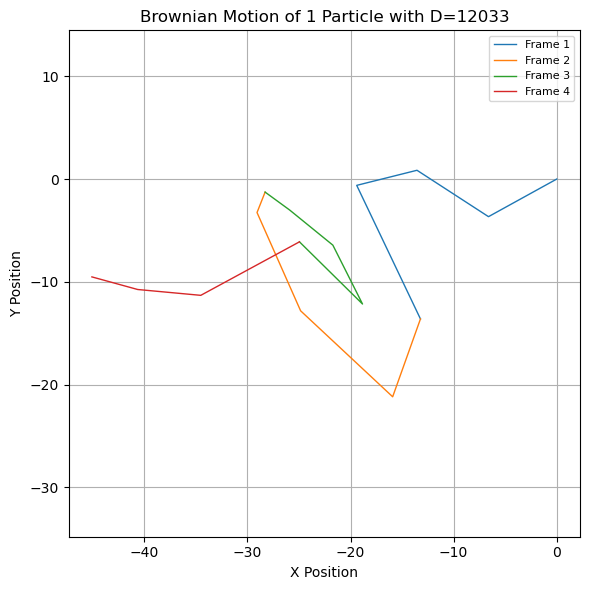

In [31]:
trajectory = brownian_motion(1, nframes, nposframe, D, dt,True)[0,:,:]
_, msd = compute_msd(trajectory,dt)
time_range = np.arange(nframes * nposframe) * dt / nposframe    # Time points for MSD plot
print(msd.shape)
print(time_range.shape)
d = estimateDfromMSD(msd, time_range[:39])
plot1ParticleTrajectory(trajectory, nframes, int(d))

(4, 64, 64)


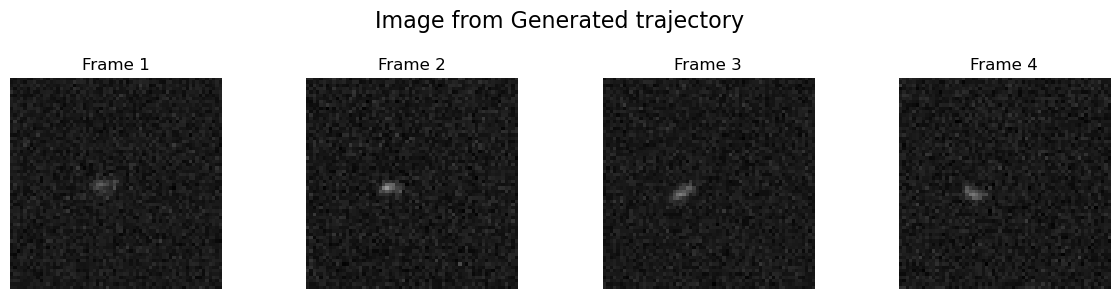

In [32]:
osef, im  =generateImageFromTrajectory(trajectory,nframes,npixel, factor_hr, nposframe, dt, fwhm_psf, pixelsize, flux, background, poisson_noise, gaussian_noise)
print(im.shape)
plot_image_frames(im/normalizeValue,"Image from Generated trajectory")
print()

Estimated Diffusion Coefficient: 950.7535121442081


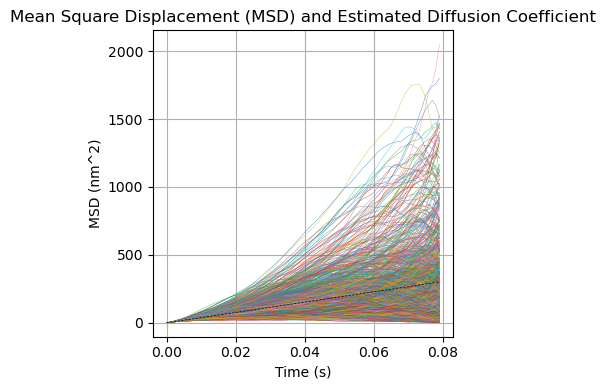

In [5]:
trajectories = brownian_motion(nparticles, nframes, nposframe, D, dt,True)
msds =  mean_square_displacements(trajectories) 
mean_estimated_D = computeAndPlotMeanMSD(msds,nparticles,nframes,nposframe,dt)


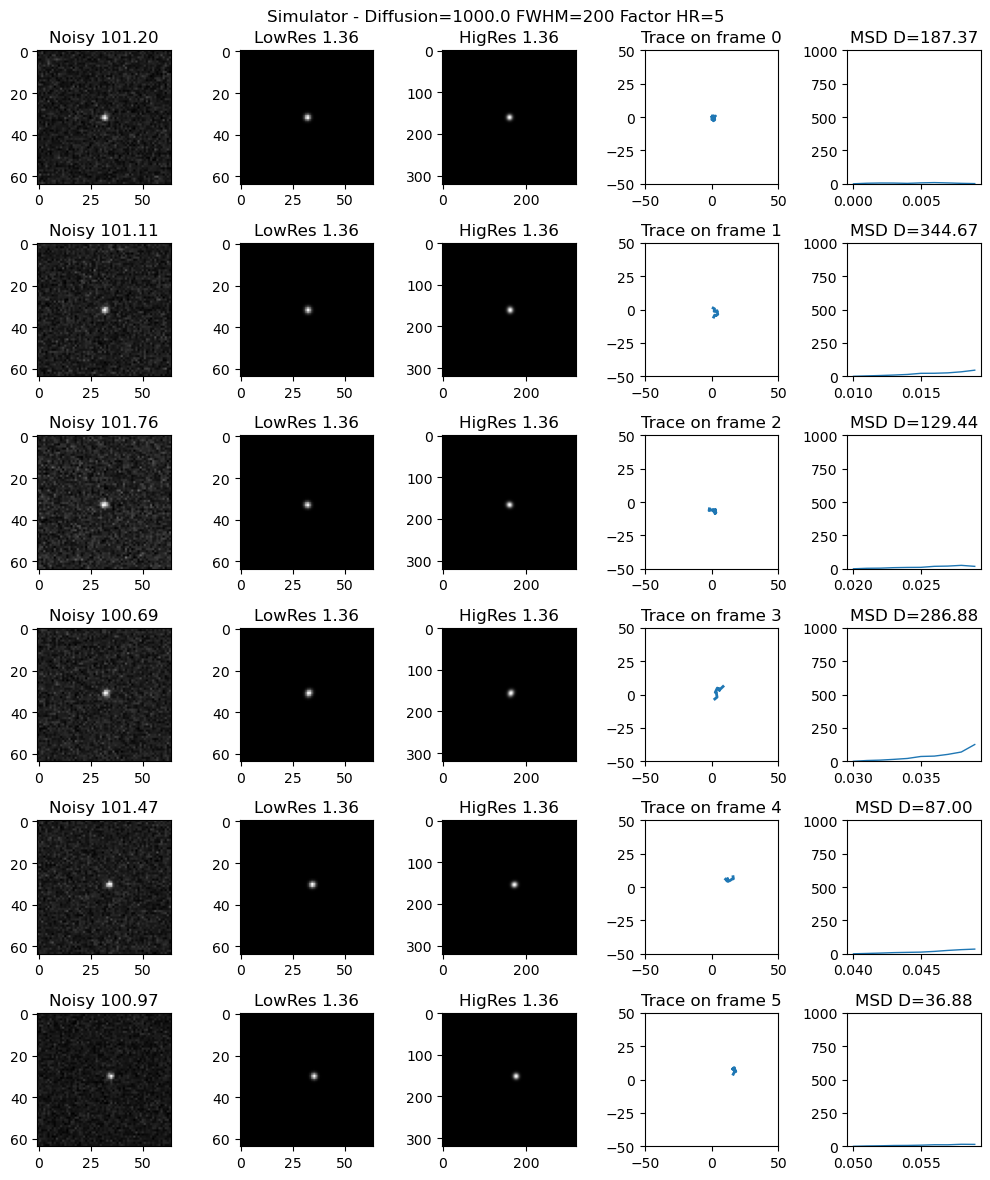

In [6]:
generateImagesAndGraphs(trajectory, D, nframes, npixel, factor_hr, nposframe, dt, fwhm_psf, pixelsize, flux, background, poisson_noise, gaussian_noise)

Estimated D: 174.83864933993638
Estimated D: 184.40177666644175
Estimated D: 1999.6460690210915
Estimated D: 10729.488475261189
Estimated D: 16867.80239640265
Estimated D: 38115.643541460995


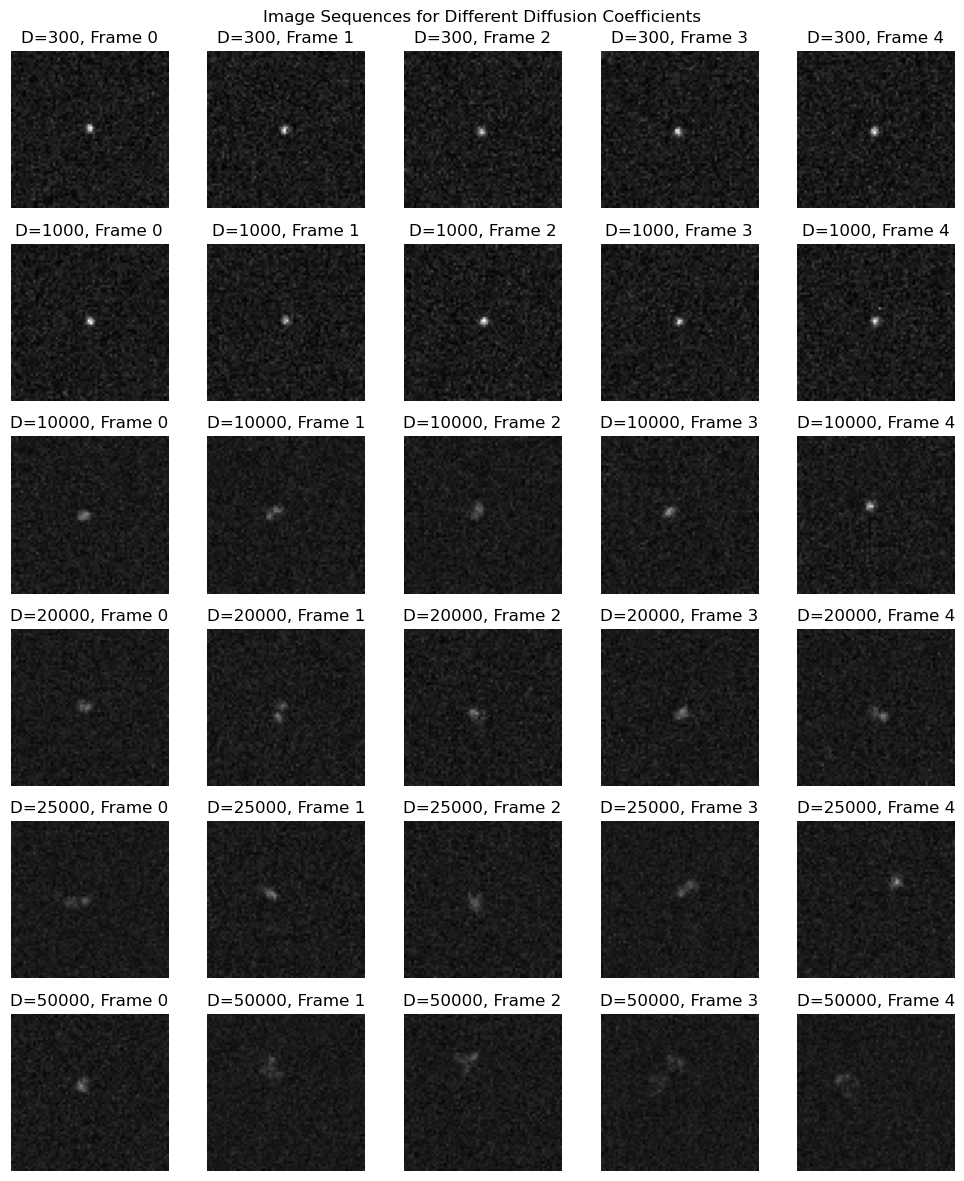

In [7]:
generateAndPlotMultipleDiffusionSequences([300,1000,10000,20000,25000,50000], nframes, npixel, factor_hr, nposframe, dt, fwhm_psf, pixelsize, flux, background, poisson_noise, gaussian_noise)

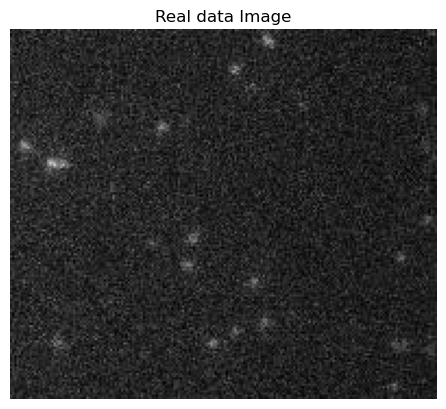

Minimum intensity: 0.00
Maximum intensity: 221.00
Mean intensity: 37.53


In [8]:
import matplotlib.pyplot as plt
from skimage import io
import numpy as np

# Load the image and convert to grayscale
grayscale_image = io.imread('./real-data/snapshot.png')

# Display the image
plt.imshow(grayscale_image, cmap='gray')
plt.axis('off')
plt.title("Real data Image")
plt.show()

# Calculate and print intensity statistics
min_intensity = np.min(grayscale_image)
max_intensity = np.max(grayscale_image)
mean_intensity = np.mean(grayscale_image)

print(f"Minimum intensity: {min_intensity:.2f}")
print(f"Maximum intensity: {max_intensity:.2f}")
print(f"Mean intensity: {mean_intensity:.2f}")

In [ ]:
particlesToGen = 16
DGen = 10000
normalizeValue = 1000
import timeit

# Generating 16 images takes approx 5.7 seconds (on my laptop) using timeit ; 0.35 / image
# Generating 10000 images would take approximately 1 hour

# Generating 16 images takes approx 2.36 seconds (on my pc) using timeit ; 0.1475 / image
# Generating 10000 images would take approximately 25 minutes
%timeit images, estimatedDs = generateImagesAndEstimateD(particlesToGen, nframes, npixel, factor_hr, nposframe, DGen, dt, fwhm_psf, pixelsize,flux, background, poisson_noise, gaussian_noise, normalizeValue)


5.7 s ± 757 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


0.0
0.51708984375
0.10083562508225441
0.0
0.65185546875
0.10092945024371147
0.0
0.6845703125
0.10132747143507004
0.017578125
0.404296875
0.10079312324523926
0.0
0.564453125
0.10194557160139084
0.0
0.84619140625
0.10157450288534164
0.0
0.6904296875
0.10132080316543579
0.0
0.5546875
0.1012427993118763
0.0
0.79150390625
0.10168547183275223
0.00951385498046875
0.35205078125
0.10051094926893711
0.01168060302734375
0.572265625
0.10148726776242256
0.01175689697265625
0.552734375
0.10272747278213501
0.0
0.66650390625
0.10226139985024929
0.0
0.75927734375
0.10201556608080864
0.01201629638671875
0.57666015625
0.10143637284636497
0.0
0.72021484375
0.10137413442134857


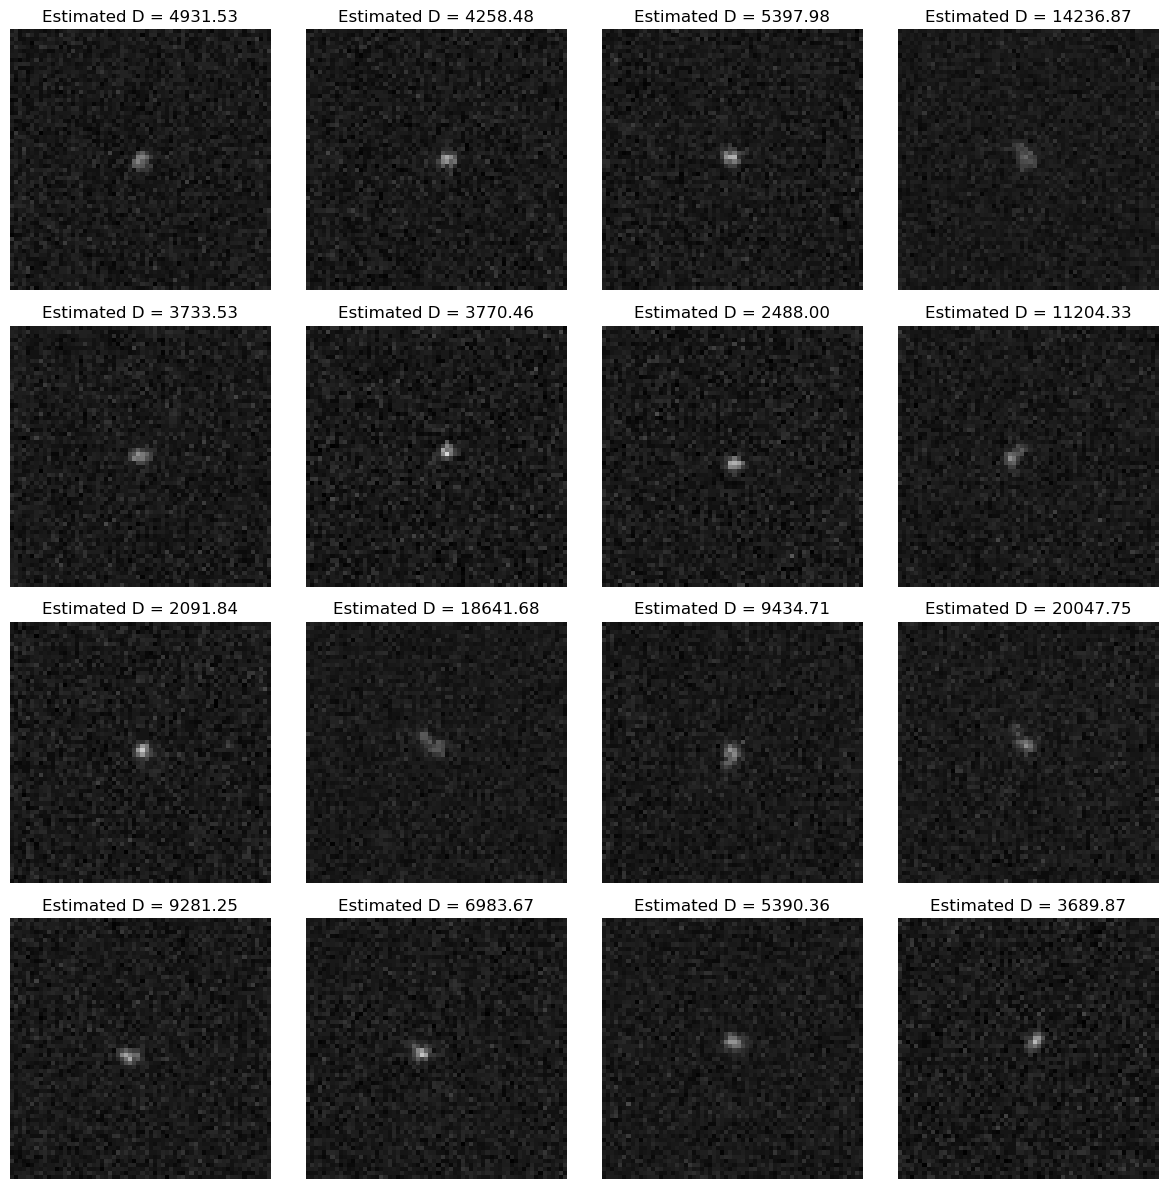

In [ ]:
import matplotlib.pyplot as plt

def plot_first_frames(images, particlesToGen):
    """
    Plots the first frame for each particle in the simulation.

    Args:
        images (np.ndarray): The simulated images, shape (particlesToGen, nframes, npixel, npixel).
        particlesToGen (int): Number of particles generated.
        nframes (int): Number of frames per particle simulation.

    Returns:
        None
    """
    # Set up the grid dimensions for plotting
    grid_size = int(np.ceil(np.sqrt(particlesToGen)))
    
    fig, axes = plt.subplots(grid_size, grid_size, figsize=(12, 12))
    axes = axes.flatten()
    
    for i in range(particlesToGen ):

        ax = axes[i]
        ax.imshow(images[i, 0], cmap='gray', interpolation='nearest', vmin=0, vmax=1 if normalizeValue != -1 else 1000)
        ax.set_title(f"Estimated D = {estimatedDs[i]:.2f}")
        ax.axis('off')  # Turn off axis for cleaner visualization
    
    # Hide unused subplots
    for j in range(particlesToGen, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()

# Call the function to plot the first frames
plot_first_frames(images, particlesToGen)